# Projeto de correlação entre as variáveis dos dados sobre Filmes

## Sobre o projeto:

O projeto a seguir, foi feito com o objetivo de identificar quais fatores, neste caso, as variáveis, mais influenciam no ganho bruto de um filme para a sua produtora, que é, de forma técnica, a correlação. Para que exista essa correlação, o ganho bruto e a outra variável devem "crescer" juntas, ou seja, quanto maior o orçamento, ou o quão mais conhecida for a produtora, maior, também, será o ganho com o filme.

Na visualização dos gráficos que serão criados nesta análise, teremos que ver essa influência, principalmente, nos gráficos de dispersão, e nos gráficos de calor. 

Para ter a certeza de que há uma alta correlação, os números apresentados, quando criarmos a análise desse fator, precisam estar o mais próximo de 0. Por exemplo, eles devem estar entre -0.6 e 1.0.

Inicialmente, suspeitamos que as influências de qual produtora dirigiu o filme, os votos do público que o assistiu e o orçamento que foi gasto na produção, podem influenciar no valor que é arrecado quando o filme faz a sua estreia e é consumido pelo público.

Através desta análise será possível concluir se essas influências contribuem para um maior ganho, ou se existem outras causas.

In [13]:
# Importando as bibliotecas, os dados e lendo-os

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Ajustando as configurações dos plots que serão criados.


df = pd.read_csv('dados/movies.csv')

In [15]:
# Visualizando os dados

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [25]:
# Renomeando as colunas para português

df.rename(columns = {'name': 'nome',
                    'rating': 'nota',
                    'genre': 'genero',
                    'year': 'ano',
                    'released': 'lancamento',
                    'score': 'pontuacao',
                    'votes': 'votos',
                    'director': 'diretor',
                    'writer': 'roteirista',
                    'star': 'estrela',
                    'country': 'país',
                    'budget': 'orcamento',
                    'gross': 'ganho_bruto',
                    'company': 'produtora',
                    'runtime': 'tempo'}, inplace = True)

df.head()

,nome,nota,genero,ano,lancamento,pontuacao,votos,diretor,roteirista,estrela,país,orcamento,ganho_bruto,produtora,tempo
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [27]:
# Fazendo uma busca por dados faltantes

for col in df.columns:
    pct_faltantes = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_faltantes))
    

nome - 0.0%
nota - 0.010041731872717789%
genero - 0.0%
ano - 0.0%
lancamento - 0.0002608242044861763%
pontuacao - 0.0003912363067292645%
votos - 0.0003912363067292645%
diretor - 0.0%
roteirista - 0.0003912363067292645%
estrela - 0.00013041210224308815%
país - 0.0003912363067292645%
orcamento - 0.2831246739697444%
ganho_bruto - 0.02464788732394366%
produtora - 0.002217005738132499%
tempo - 0.0005216484089723526%


In [29]:
# Lidando com os valores faltantes

df = df.dropna()


In [31]:
# Tipos de dados para as colunas

df.dtypes


nome            object
nota            object
genero          object
ano              int64
lancamento      object
pontuacao      float64
votos          float64
diretor         object
roteirista      object
estrela         object
país            object
orcamento      float64
ganho_bruto    float64
produtora       object
tempo          float64
dtype: object

As variáveis contendo o orçamento e o ganho bruto, presentes no dataframe, são do tipo float, ou seja, estão sendo apresentada como números decimais, mas podemos observar que, após o ponto, possuímos apenas o número 0, que, neste caso, não influencia na análise, e se caso continue como tipo float, pode apresentar algum erro no decorrer do trabalho com o dataframe. 

Assim sendo, podemos alterar o tipo de dado da variável para que possamos prosseguir com a análise.

In [33]:
# Alterando o tipo de dado da coluna

df['orcamento'] = df['orcamento'].astype('int64')
df['ganho_bruto'] = df['ganho_bruto'].astype('int64')


In [35]:
df.head()

,nome,nota,genero,ano,lancamento,pontuacao,votos,diretor,roteirista,estrela,país,orcamento,ganho_bruto,produtora,tempo
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


Em uma primeira visualização desses dados, foi possível identificar que haviam algumas discrepâncias entre os dados de lançamento do filme e a variável de ano. Por esse motivo, é recomendado criar então, uma nova coluna no dataframe que retrate de forma verdadeira o ano em que o filme foi lançado.

In [37]:
# Criando uma coluna com o ano correto, caso haja alguma discrepância entre as colunas de lançamento e ano

df['ano_correto'] = df['lancamento'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()


,nome,nota,genero,ano,lancamento,pontuacao,votos,diretor,roteirista,estrela,país,orcamento,ganho_bruto,produtora,tempo,ano_correto
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


A partir daqui, iremos fazer mais algumas limpezas necessárias para que a nossa análise seja precisa e retrate exatamente o que queremos dela. Após concluir a limpeza, iremos iniciar o nosso processo de identificação da correlação de fatores com o ganho bruto dos filmes.

In [39]:
# Ordenando a visualização

df = df.sort_values(by = ['ganho_bruto'], inplace = False, ascending = False)
df.head()



,nome,nota,genero,ano,lancamento,pontuacao,votos,diretor,roteirista,estrela,país,orcamento,ganho_bruto,produtora,tempo,ano_correto
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [11]:
pd.set_option('display.max_rows', None)

In [41]:
# Excluindo qualquer dado que esteja duplicado

df.drop_duplicates().head()

,nome,nota,genero,ano,lancamento,pontuacao,votos,diretor,roteirista,estrela,país,orcamento,ganho_bruto,produtora,tempo,ano_correto
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


Nas próximas execuções de código, iremos identificar se há uma correlação entre o orçamento e o ganho bruto, e também, se existe essas condição entre a produtora e o ganho bruto.

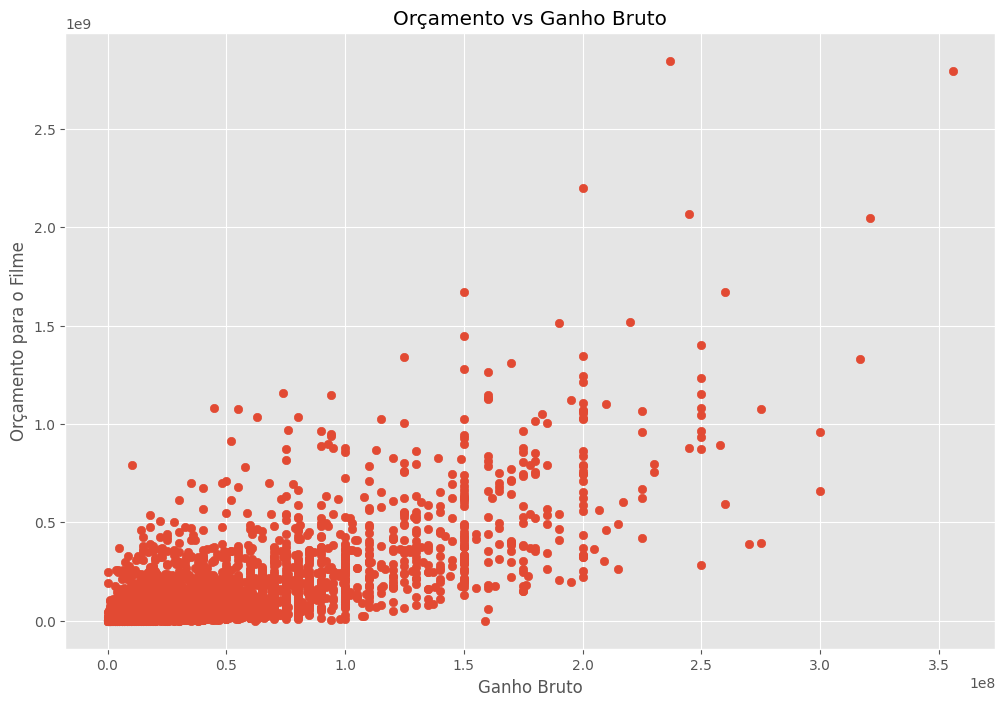

In [49]:
# Gráfico de dispersão do Orçamento vs Ganho Bruto com matplotlib

plt.scatter(x = df['orcamento'], y = df['ganho_bruto'])
plt.title('Orçamento vs Ganho Bruto')

plt.xlabel('Ganho Bruto')
plt.ylabel('Orçamento para o Filme')

plt.show()


In [45]:
df.head()

,nome,nota,genero,ano,lancamento,pontuacao,votos,diretor,roteirista,estrela,país,orcamento,ganho_bruto,produtora,tempo,ano_correto
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='orcamento', ylabel='ganho_bruto'>

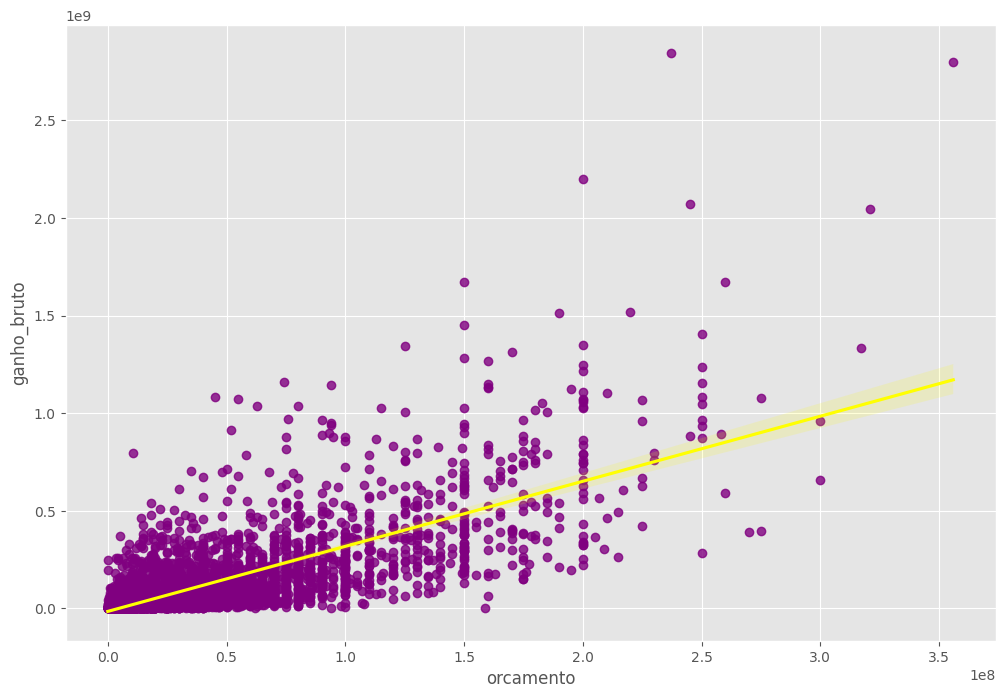

In [47]:
# Plotar Orçamento vs Ganho Bruto usando a bibloteca Seaborn

sns.regplot(x = 'orcamento', y = 'ganho_bruto', data = df, scatter_kws = {'color': 'purple'}, line_kws = {'color': 'yellow'})

In [17]:
# Começando a verificar a correlação

df.corr(method = 'pearson') #pearson, kendall, spearman

/tmp/ipykernel_965/2457140388.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson') #pearson, kendall, spearman


,ano,pontuacao,votos,orcamento,ganho_bruto,tempo,ano_correto
ano,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
pontuacao,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votos,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
orcamento,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
ganho_bruto,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
tempo,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
ano_correto,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


À primeira vista, existe uma alta correlação entre o orçamento e o ganho bruto, mas que, sendo verídico, poderá ser confirmado mais adiante.

/tmp/ipykernel_965/3669052207.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = df.corr(method = 'pearson')


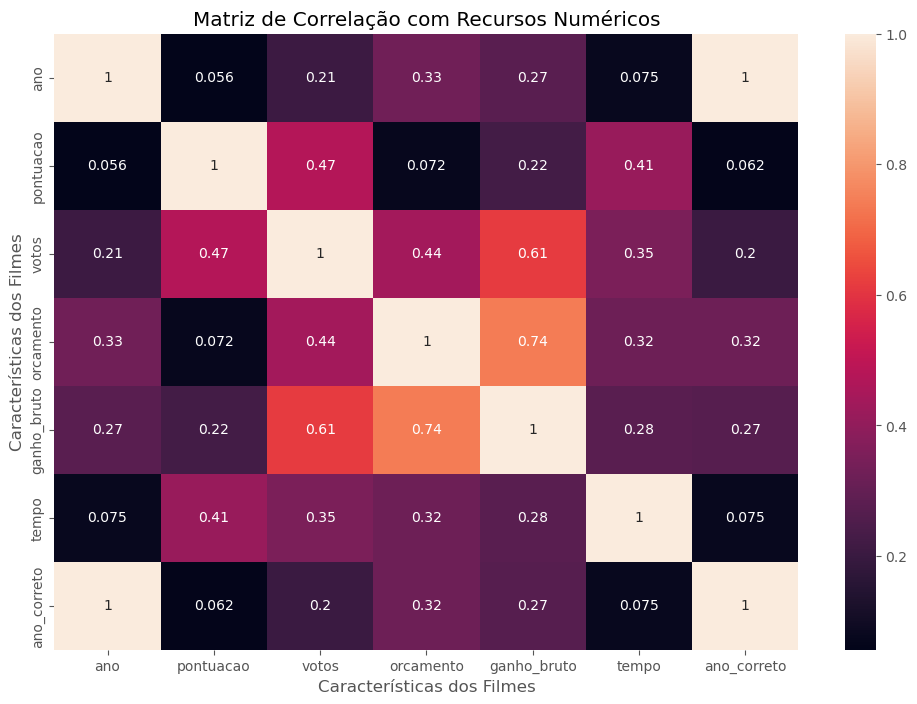

In [30]:
matriz_correlacao = df.corr(method = 'pearson')

sns.heatmap(matriz_correlacao, annot = True)
plt.title('Matriz de Correlação com Recursos Numéricos')

plt.xlabel('Características dos Filmes')
plt.ylabel('Características dos Filmes')


plt.show()


Avaliando se pode haver uma alta correlação entre as variáveis que estamos supondo que tenham um alto índice de relação entre si. As variáveis, para nos lembrarmos, são, orçamento, produtora e votos do público.

Para seguir com essa etapa, também iremos alterar o modo de visualizar os dados do tipo object (strings) dos filmes, criando uma distribuição aleatória de números, como uma codificação para cada um, fazendo então, com que todas as variáveis do nosso dataframe estejam distribuídos como números, o que irá facilitar na criação dos códigos necessários para identificarmos quais as maiores correlações entres os fatores presentes na nossa análise.

In [32]:
df.head()

,nome,nota,genero,ano,lancamento,pontuacao,votos,diretor,roteirista,estrela,país,orcamento,ganho_bruto,produtora,tempo,ano_correto
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [36]:
df_numerizado = df

for col_name in df_numerizado.columns:
    if(df_numerizado[col_name].dtype == 'object'):
        df_numerizado[col_name] = df_numerizado[col_name].astype('category')
        df_numerizado[col_name] = df_numerizado[col_name].cat.codes
        
df_numerizado.head()


,nome,nota,genero,ano,lancamento,pontuacao,votos,diretor,roteirista,estrela,país,orcamento,ganho_bruto,produtora,tempo,ano_correto
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


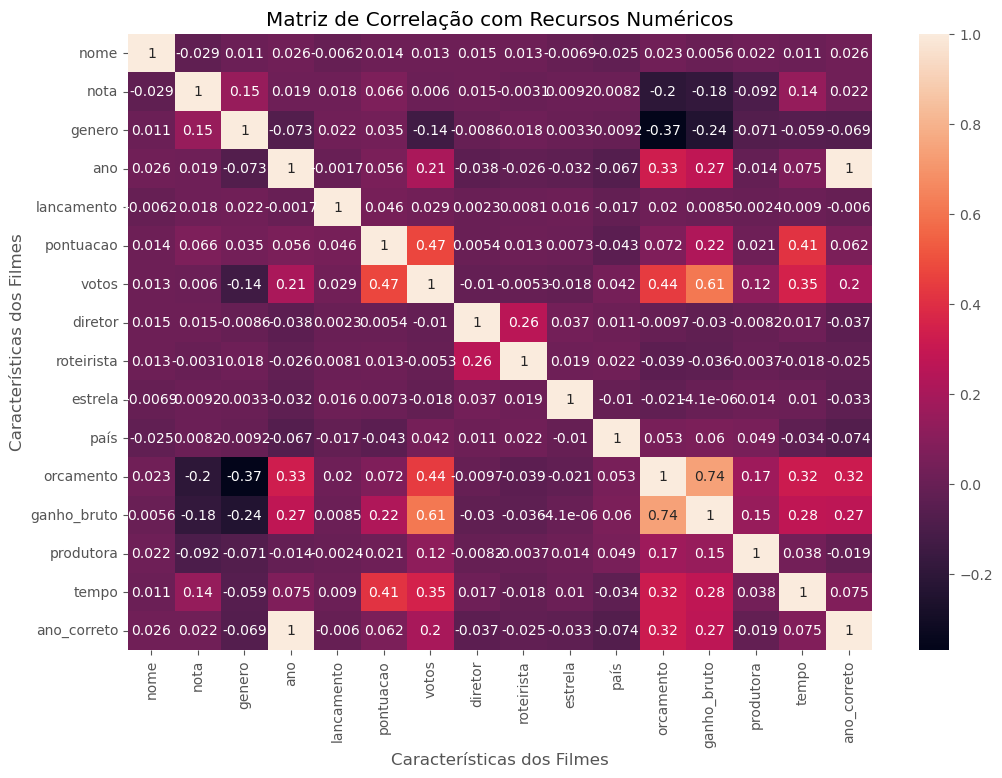

In [40]:
matriz_correlacao = df_numerizado.corr(method = 'pearson')

sns.heatmap(matriz_correlacao, annot = True)
plt.title('Matriz de Correlação com Recursos Numéricos')

plt.xlabel('Características dos Filmes')
plt.ylabel('Características dos Filmes')


plt.show()

In [42]:
mat_correlacao = df_numerizado.corr()

pares_corr = mat_correlacao.unstack()

pares_corr

nome         nome           1.000000
             nota          -0.029234
             genero         0.010996
             ano            0.025542
             lancamento    -0.006152
             pontuacao      0.014450
             votos          0.012615
             diretor        0.015246
             roteirista     0.012880
             estrela       -0.006882
             país          -0.025490
             orcamento      0.023392
             ganho_bruto    0.005639
             produtora      0.021697
             tempo          0.010850
             ano_correto    0.025542
nota         nome          -0.029234
             nota           1.000000
             genero         0.147796
             ano            0.019499
             lancamento     0.018083
             pontuacao      0.065983
             votos          0.006031
             diretor        0.014656
             roteirista    -0.003149
             estrela        0.009196
             país           0.008230
 

In [44]:
pares_ordenados = pares_corr.sort_values()

pares_ordenados

genero       orcamento     -0.368523
orcamento    genero        -0.368523
ganho_bruto  genero        -0.244101
genero       ganho_bruto   -0.244101
nota         orcamento     -0.203946
orcamento    nota          -0.203946
nota         ganho_bruto   -0.181906
ganho_bruto  nota          -0.181906
votos        genero        -0.135990
genero       votos         -0.135990
produtora    nota          -0.092357
nota         produtora     -0.092357
país         ano_correto   -0.073569
ano_correto  país          -0.073569
ano          genero        -0.073167
genero       ano           -0.073167
             produtora     -0.071334
produtora    genero        -0.071334
genero       ano_correto   -0.069147
ano_correto  genero        -0.069147
ano          país          -0.066748
país         ano           -0.066748
genero       tempo         -0.059237
tempo        genero        -0.059237
pontuacao    país          -0.043051
país         pontuacao     -0.043051
roteirista   orcamento     -0.039466
o

In [46]:
alta_correlacao = pares_ordenados[(pares_ordenados) > 0.5]

alta_correlacao

ganho_bruto  votos          0.614751
votos        ganho_bruto    0.614751
ganho_bruto  orcamento      0.740247
orcamento    ganho_bruto    0.740247
ano          ano_correto    0.998726
ano_correto  ano            0.998726
nome         nome           1.000000
produtora    produtora      1.000000
ganho_bruto  ganho_bruto    1.000000
orcamento    orcamento      1.000000
país         país           1.000000
estrela      estrela        1.000000
roteirista   roteirista     1.000000
diretor      diretor        1.000000
votos        votos          1.000000
pontuacao    pontuacao      1.000000
lancamento   lancamento     1.000000
ano          ano            1.000000
genero       genero         1.000000
nota         nota           1.000000
tempo        tempo          1.000000
ano_correto  ano_correto    1.000000
dtype: float64

# Considerações Finais:

  Os votos e o orçamento dos filmes são as variáveis com maior correlação ao ganho bruto. Por exemplo, um filme com um grande número de votos, por consequência, também teve uma grande bilheteria, ou seja, um alto ganho bruto para a produtora e todos os envolvidos no filme. 
  
  No caso do orçamento acontece o mesmo. Quanto maior o investimento na produção, maior será a arrecadação, visto que, o dinheiro que é usado para produzir os filmes são destinados para a locação de sets de filmagem, atores e toda a equipe que participa do projeto, também, para a edição e toda a criação dos bastidores. 
  
  Já a produtora não possui grande influência nesses ganhos, mesmo que elas sejam conhecidas e tenham grandes filmes em seu portfolio, como pôde ser visto nas visualizações feitas acima, constatando então, que, a nossa suposição do início da análise não se concretizou no caso da produtora.
